# 6장 회귀 및 릿지 모델  (이하 추가 코딩)
책에 기술된 코딩문은 아래 6.4.1 회귀 모델과 릿지 모델 부분에 수록


# 연속변수 타겟일 경우 표준화 데이터셋 Regression 모델

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/Bike-standard-Count.csv')
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8751 non-null   float64
 1   Temperature        8751 non-null   float64
 2   Humidity           8751 non-null   float64
 3   Wind speed         8751 non-null   float64
 4   Visibility         8751 non-null   float64
 5   Solar Radiation    8751 non-null   float64
 6   Functioning Day    8751 non-null   int64  
 7   Holiday            8751 non-null   int64  
 8   Date_1.0           8751 non-null   int64  
 9   Date_2.0           8751 non-null   int64  
 10  Date_3.0           8751 non-null   int64  
 11  Date_4.0           8751 non-null   int64  
 12  Date_5.0           8751 non-null   int64  
 13  Date_6.0           8751 non-null   int64  
 14  Date_7.0           8751 non-null   int64  
 15  Date_8.0           8751 non-null   int64  
 16  Date_9.0           8751 

In [3]:
data = df.drop(['Rented Bike Count'], axis=1)   # 타겟변수(VALP임에 주의)를 제외한 입력변수를 data에 저장
target = df['Rented Bike Count']                # 타겟변수만 target에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4375, 46)
X_test shape: (4376, 46)


In [4]:
# 연속변수 타겟변수일 때 Linear Regression 모델 (Default 모델)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linr = LinearRegression(n_jobs=-1)
model = linr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Linear Regression Training set r2 score:{:.5f}".format(model.score(X_train, y_train)))
print ("Linear Regression Test set r2 score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set r2 score:0.65731
Linear Regression Test set r2 score:0.64409


# 연속변수 타겟일 경우 표준화 데이터셋 Ridge 모델

In [27]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델)
from sklearn.linear_model import Ridge
Ridge = Ridge()
model = Ridge.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Ridge Regression Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Ridge Regression Test set score:{:.5f}".format(r2_score(y_test, pred)))

Ridge Regression Training set score:0.65730
Ridge Regression Test set score:0.64422


In [28]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델)
from sklearn.linear_model import Ridge
Ridge = Ridge()

In [9]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],\
         'solver':['auto', 'svd', 'lsqr', 'cholesky','sparse_cg','sag','saga']}

grid_Ridge = GridSearchCV(Ridge, param_grid=params, scoring='r2', cv=5,\
                       n_jobs=-1, verbose=1)
grid_Ridge.fit(X_train, y_train)

print("GridSearchCV max score:{:.5f}".format(grid_Ridge.best_score_))
print("GridSearchCV best parameter:", (grid_Ridge.best_params_))

Fitting 5 folds for each of 49 candidates, totalling 245 fits
GridSearchCV max score:0.64674
GridSearchCV best parameter: {'alpha': 1, 'solver': 'saga'}


In [10]:
best_clf = grid_Ridge.best_estimator_
pred = best_clf.predict(X_test)

print("R2 Score on test set:{:.5f}".format(best_clf.score(X_test, y_test)))

R2 Score on test set:0.64423


# 연속변수 타겟일 경우 Lasso 모델
# 실행 결과 Lasso 모델은 성능이 전혀 나오지 않음

In [ ]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델)
from sklearn.linear_model import Lasso
Lasso = Lasso()
model = Lasso.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Linear Regression Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Linear Regression Test set score:{:.5f}".format(r2_score(pred, y_test)))

Linear Regression Training set score:0.00000
Linear Regression Test set score:-324446184053398206109918257351753728.00000


# 로그변환한 데이터로 Regression 실행

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/Bike-log-Count.csv')

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature10th    8751 non-null   float64
 1   Wind speed         8751 non-null   float64
 2   Solar Radiation    8751 non-null   float64
 3   Rented Bike Count  8751 non-null   float64
 4   Humidity           8751 non-null   float64
 5   Visibility         8751 non-null   float64
 6   Functioning Day    8751 non-null   int64  
 7   Holiday            8751 non-null   int64  
 8   Date_1.0           8751 non-null   int64  
 9   Date_2.0           8751 non-null   int64  
 10  Date_3.0           8751 non-null   int64  
 11  Date_4.0           8751 non-null   int64  
 12  Date_5.0           8751 non-null   int64  
 13  Date_6.0           8751 non-null   int64  
 14  Date_7.0           8751 non-null   int64  
 15  Date_8.0           8751 non-null   int64  
 16  Date_9.0           8751 

In [12]:
data = df.drop(['Rented Bike Count'], axis=1)   # 타겟변수(VALP임에 주의)를 제외한 입력변수를 data에 저장
target = df['Rented Bike Count']                # 타겟변수만 target에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4375, 46)
X_test shape: (4376, 46)


In [13]:
# 연속변수 타겟변수일 때 Linear Regression 모델 (Default 모델)
from sklearn.linear_model import LinearRegression
lin_r = LinearRegression(n_jobs=-1)
model = lin_r.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Linear Regression Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Linear Regression Test set score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set score:0.80993
Linear Regression Test set score:0.80460


# 로그변환한 데이터로 Ridge실행

In [14]:
# 연속변수 타겟변수일 때 Lasso 모델 (Default 모델)
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
Ridge = Ridge()
model = Ridge.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Ridge Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Ridge Test set score:{:.5f}".format(r2_score(y_test, pred)))

Ridge Training set score:0.80989
Ridge Test set score:0.80460


In [15]:
# 연속변수 타겟변수일 때 Lasso 모델 (Default 모델)
from sklearn.linear_model import Ridge
Ridge = Ridge()

In [16]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],\
         'solver':['auto', 'svd', 'lsqr', 'cholesky','sparse_cg','sag','saga']}

grid_Ridge = GridSearchCV(Ridge, param_grid=params, scoring='r2', cv=5,\
                       n_jobs=-1, verbose=1)
grid_Ridge.fit(X_train, y_train)

print("GridSearchCV max score:{:.5f}".format(grid_Ridge.best_score_))
print("GridSearchCV best parameter:", (grid_Ridge.best_params_))

Fitting 5 folds for each of 49 candidates, totalling 245 fits
GridSearchCV max score:0.80452
GridSearchCV best parameter: {'alpha': 1, 'solver': 'auto'}


In [17]:
best_clf = grid_Ridge.best_estimator_
pred = best_clf.predict(X_test)

print("R2 Score on test set:{:.5f}".format(best_clf.score(X_test, y_test)))
#print("R2 Score on test set:{:.5f}".format(r2_score(y_test, pred)))

R2 Score on test set:0.80460


# 6.4.1 회귀 모델과 릿지 모델

# Unscaled 데이터로 Regression 실행

In [18]:
# 위의 참조 코딩에서 코랩에 구글 드라이브 연동을 실시하지 않았을 경우 다음을 실행
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/Bike-unscaled-Count.csv')
df.shape

(8751, 47)

In [20]:
data = df.drop(['Rented Bike Count'], axis=1)   # 타겟변수(VALP임에 주의)를 제외한 입력변수를 data에 저장
target = df['Rented Bike Count']                # 타겟변수만 target에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4375, 46)
X_test shape: (4376, 46)


In [21]:
# 연속변수 타겟변수일 때 Linear Regression 모델 (Default 모델)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linr = LinearRegression(n_jobs=-1)
model = linr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Linear Regression Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Linear Regression Test set r2 score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set score:0.65731
Linear Regression Test set r2 score:0.64409


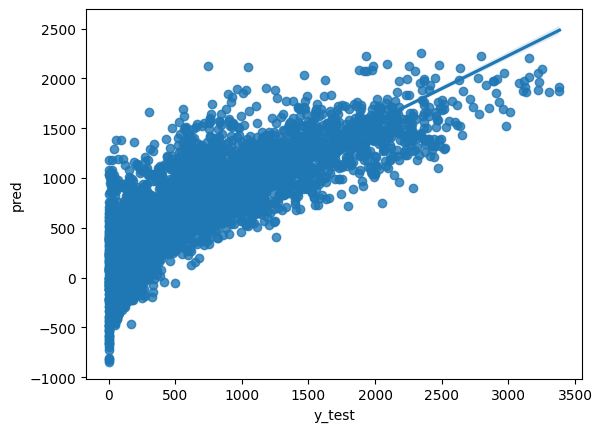

In [22]:
import seaborn as sns

final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(pred)], axis = 1)
final_result.columns = ['y_test','pred']
sns.regplot(x = 'y_test', y = 'pred', data = final_result);

# Unscaled 데이터셋일 때 Ridge 모델

In [29]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델).
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
Ridge = Ridge()
model = Ridge.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성.

print ("Ridge Regression Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Ridge Regression Test set score:{:.5f}".format(r2_score(y_test, pred)))

Ridge Regression Training set score:0.65730
Ridge Regression Test set score:0.64422


In [24]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델)
from sklearn.linear_model import Ridge
Ridge = Ridge()

In [25]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'solver':['auto', 'svd', 'lsqr', 'cholesky','sparse_cg','sag','saga']}

grid_Ridge = GridSearchCV(Ridge, param_grid=params, scoring='r2', cv=5,\
                       n_jobs=-1, verbose=1)
grid_Ridge.fit(X_train, y_train)

print("GridSearchCV max score:{:.5f}".format(grid_Ridge.best_score_))
print("GridSearchCV best parameter:", (grid_Ridge.best_params_))

Fitting 5 folds for each of 49 candidates, totalling 245 fits
GridSearchCV max score:0.64674
GridSearchCV best parameter: {'alpha': 1, 'solver': 'svd'}


In [26]:
best_clf = grid_Ridge.best_estimator_
pred = best_clf.predict(X_test)

print("R2 Score on test set:{:.5f}".format(best_clf.score(X_test, y_test)))

R2 Score on test set:0.64422
